# Cross validation of time series data

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
series = read_csv('data/sunspots.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True)
rng1 = pd.date_range(series.index[0], periods=len(series), freq='M')#.shift(1, freq=pd.datetools.day)
series = pd.Series(series.values, index=rng1)
print(series.head())

1700-01-31     5.0
1700-02-28    11.0
1700-03-31    16.0
1700-04-30    23.0
1700-05-31    36.0
Freq: M, dtype: float64


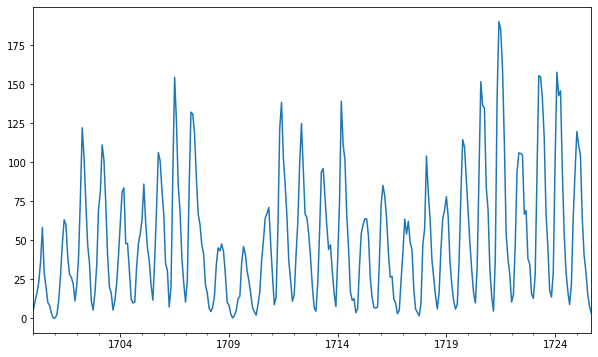

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [5]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 309
Training Observations: 203
Testing Observations: 106


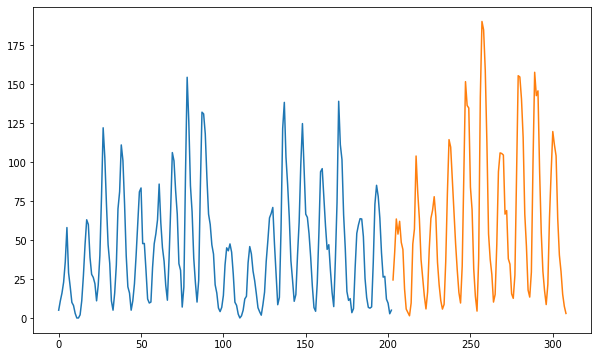

In [6]:
plt.figure(figsize=(10,6));
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.show()

- Aby dobrze nauczyć model nie możemy uczyć na tych samych danych co testujemy. 
- W tym celu dzielimy nasze dane na zbiór treningowy i testowy.
- Możemy powtórzyć proces dzielenia szeregu czasowego na zestawy podciągów i testować wielokrotnie.
- Metoda ta używa coraz to większą i większą historię w procesie uczenia. 

In [20]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

Observations: 155
Training Observations: 78
Testing Observations: 77


<Figure size 432x288 with 0 Axes>

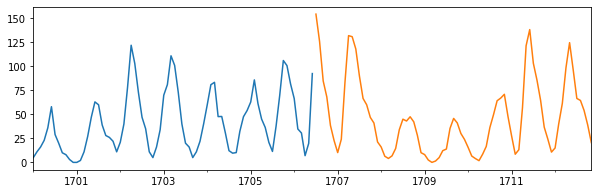

Observations: 232
Training Observations: 155
Testing Observations: 77


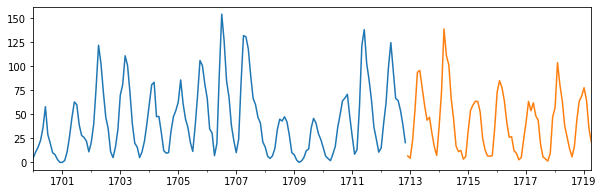

Observations: 309
Training Observations: 232
Testing Observations: 77


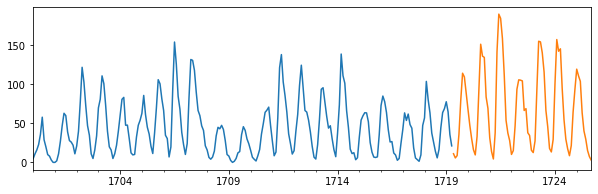

In [15]:
X = series.values
splits = TimeSeriesSplit(n_splits=3)
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    trainS= series[train_index]
    testS= series[test_index]
    plt.figure(figsize=[10,3])
    trainS.plot()
    testS.plot()
    plt.show()


# Zadanie 1
W każdym kroku naucz model ARIMA(4,1,0) i wypisz śreni błąd dla modelu oraz dla predykcji naiwnej, jak również średni błąd dla danych testowych i predykcji naiwnej.